# Exercise with A/B Testing

### Prompt

Let’s imagine you work on the For You Page at TikTok. Your team decides that instead of a heart button, they want to change it to star hoping that it will lead to a higher engagement/like rate. The product manager told you that the current conversion rate is about 6% on average throughout the year, and that the team would be happy with an increase of 3%, meaning that the new design will be considered a success if it raises the engagement rate to 9%.

Before rolling out the change, the team would be more comfortable testing it on a small number of users to see how it performs, so you suggest running an A/B test on a subset of the user base users.

In [1]:
# Packages imports
import numpy as np
import pandas as pd

# probability distributions & statistical functions
import scipy.stats as stats
# estimating statistical models
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
import seaborn as sns

#rounding function
from math import ceil



### Sample Size Calculation

In [4]:
# Calculate effect size based on our expected rates
effect_size = sms.proportion_effectsize(0.06, 0.09)

In [5]:
# Calculate sample size needed
required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power = 0.8,
    alpha = 0.05,
    ratio = 1
)

required_n = ceil(required_n)
print(required_n)

1199


### Collecting and preparing the data

In [6]:
# Load the tiktok_data.csv into a dataframe

df = pd.read_csv('data/tiktok_data.csv')
df

,user_id,timestamp,group,button,liked
0,767017,2017-01-12 22:58:15,control,star,0
1,793849,2017-01-23 22:36:11,treatment,star,0
2,905617,2017-01-20 14:12:19,treatment,star,0
3,746742,2017-01-23 11:38:30,control,heart,0
4,892356,2017-01-05 9:35:15,treatment,star,1
...,...,...,...,...,...
275776,694647,2017-01-04 13:57:56,control,heart,0
275777,794969,2017-01-11 7:19:10,treatment,star,0
275778,679368,2017-01-18 11:54:14,treatment,star,0
275779,742454,2017-01-02 15:16:33,treatment,star,0


In [7]:
# Get the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275781 entries, 0 to 275780
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    275781 non-null  int64 
 1   timestamp  275781 non-null  object
 2   group      275781 non-null  object
 3   button     275781 non-null  object
 4   liked      275781 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.5+ MB


In [8]:
# Make sure all the control group are seeing the heart button and viceversa
control_df = df[df['group'] == 'control']
treatment_df = df[df['group'] == 'treatment']

In [10]:
control_heart_df = control_df[control_df['button'] == 'heart']
control_heart_df

,user_id,timestamp,group,button,liked
3,746742,2017-01-23 11:38:30,control,heart,0
6,913579,2017-01-24 9:11:39,control,heart,1
8,690284,2017-01-13 17:22:57,control,heart,0
12,710349,2017-01-11 22:24:44,control,heart,0
13,677533,2017-01-23 17:48:50,control,heart,0
...,...,...,...,...,...
275770,850065,2017-01-17 11:57:19,control,heart,1
275771,880066,2017-01-04 5:47:41,control,heart,0
275772,871941,2017-01-07 9:48:25,control,heart,0
275774,886877,2017-01-04 8:34:18,control,heart,0


In [13]:
treatment_star_df = treatment_df[treatment_df['button'] == 'star']
treatment_star_df

,user_id,timestamp,group,button,liked
1,793849,2017-01-23 22:36:11,treatment,star,0
2,905617,2017-01-20 14:12:19,treatment,star,0
4,892356,2017-01-05 9:35:15,treatment,star,1
5,773302,2017-01-12 8:29:50,treatment,star,0
7,736159,2017-01-06 1:50:21,treatment,star,0
...,...,...,...,...,...
275775,670432,2017-01-17 21:30:42,treatment,star,0
275777,794969,2017-01-11 7:19:10,treatment,star,0
275778,679368,2017-01-18 11:54:14,treatment,star,0
275779,742454,2017-01-02 15:16:33,treatment,star,0


In [15]:
# Check that no users have been sampled multiple times 

concat_df = pd.concat([control_heart_df, treatment_star_df], ignore_index = True)
concat_df

,user_id,timestamp,group,button,liked
0,746742,2017-01-23 11:38:30,control,heart,0
1,913579,2017-01-24 9:11:39,control,heart,1
2,690284,2017-01-13 17:22:57,control,heart,0
3,710349,2017-01-11 22:24:44,control,heart,0
4,677533,2017-01-23 17:48:50,control,heart,0
...,...,...,...,...,...
272105,670432,2017-01-17 21:30:42,treatment,star,0
272106,794969,2017-01-11 7:19:10,treatment,star,0
272107,679368,2017-01-18 11:54:14,treatment,star,0
272108,742454,2017-01-02 15:16:33,treatment,star,0


In [16]:
concat_df.duplicated(subset = 'user_id').sum()

1

In [18]:
# If there are users who have been sampled multiple times, remove them from the dataframe
dropped_df = concat_df.drop_duplicates(subset = 'user_id')
dropped_df

,user_id,timestamp,group,button,liked
0,746742,2017-01-23 11:38:30,control,heart,0
1,913579,2017-01-24 9:11:39,control,heart,1
2,690284,2017-01-13 17:22:57,control,heart,0
3,710349,2017-01-11 22:24:44,control,heart,0
4,677533,2017-01-23 17:48:50,control,heart,0
...,...,...,...,...,...
272105,670432,2017-01-17 21:30:42,treatment,star,0
272106,794969,2017-01-11 7:19:10,treatment,star,0
272107,679368,2017-01-18 11:54:14,treatment,star,0
272108,742454,2017-01-02 15:16:33,treatment,star,0


In [19]:
dropped_df['user_id'].nunique()

272109

In [20]:
pd.crosstab(dropped_df['group'], dropped_df['button'])

button,heart,star
group,,
control,136002,0
treatment,0,136107


#### Now that our DataFrame is nice and clean, we can proceed and sample n=4720 entries for each of the groups. We can use pandas' DataFrame.sample() method to do this, which will perform Simple Random Sampling for us.

In [21]:
# Perform simple random sampling to split the data into control and treatment
control_sample = dropped_df[dropped_df['group'] == 'control'].sample(n = required_n, random_state = 444)
treatment_sample = dropped_df[dropped_df['group'] == 'treatment'].sample(n = required_n, random_state = 444)


In [22]:
# Create one table called ab_test that has both the cleaned control and treatment data
ab_test = pd.concat([control_sample, treatment_sample], ignore_index = True)
ab_test


,user_id,timestamp,group,button,liked
0,743360,2017-01-04 23:12:43,control,heart,0
1,781031,2017-01-04 7:32:58,control,heart,0
2,726048,2017-01-24 7:42:28,control,heart,0
3,852931,2017-01-09 0:34:11,control,heart,0
4,709201,2017-01-04 23:03:53,control,heart,0
...,...,...,...,...,...
2393,697547,2017-01-11 23:20:30,treatment,star,0
2394,643167,2017-01-19 6:23:00,treatment,star,1
2395,679389,2017-01-07 17:28:12,treatment,star,0
2396,648660,2017-01-06 21:57:05,treatment,star,0


In [23]:
# Count the test groups to make sure that they're balanced 
ab_test['group'].value_counts()


control      1199
treatment    1199
Name: group, dtype: int64

In [24]:
summary_stats = ab_test.groupby('group')['liked'].agg(['std', 'mean', 'sem', 'sum', 'count']).reset_index()
summary_stats

,group,std,mean,sem,sum,count
0,control,0.336563,0.130108,0.009720,156,1199
1,treatment,0.343759,0.136781,0.009928,164,1199


### Analysis Visualization

Text(0, 0.5, 'Like Rate (proportion)')

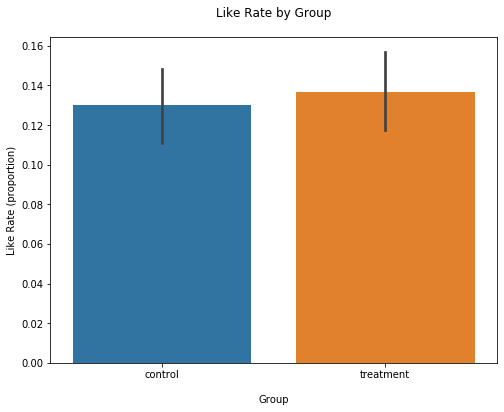

In [25]:
# Plot the like rate by group on a bar plot

plt.figure(figsize = (8,6))

sns.barplot(x = ab_test['group'], y = ab_test['liked'])

plt.title('Like Rate by Group', pad = 20)
plt.xlabel('Group', labelpad = 15)
plt.ylabel('Like Rate (proportion)')

### Testing for Stat Sig

In [33]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Get the like count for both control and treatment groups
control_results = ab_test[ab_test['group'] == 'control']['liked']
treatment_results = ab_test[ab_test['group'] == 'treatment']['liked']

n_con = control_results.count()
n_treat = treatment_results.count()

# Sum up the number of successes (likes) in both groups
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

print('observation in control', n_con)
print('observation in treatment', n_treat)
print(f'successes in control {successes[0]}, and successes in treatment {successes[1]}.')

observation in control 1199
observation in treatment 1199
successes in control 156, and successes in treatment 164.


In [34]:
# Find the z statistic and p value for proportions based on normal ztest
z_stat, pval = proportions_ztest(
    successes,
    nobs = nobs
)

# Find the confidence intervals for each test group

(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(
    successes, 
    nobs = nobs, 
    alpha = 0.05)

In [35]:
# print z statistic
print(f'z statistics: {z_stat:.2f}')
# print p-value
print(f'p-value: {pval:.6f}')
# print ci 95% for control group
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
# print ci 95% for treatment group
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistics: -0.48
p-value: 0.630932
ci 95% for control group: [0.111, 0.149]
ci 95% for treatment group: [0.117, 0.156]


### Were the results signficant? 

The p-value is 0.63, which is higher than our alpha 0.05. Therefore, we failed to reject the null hypothesis. As a result, our new design of changing heart button to star was not statistically significant better than the old one.

### What would you advise the engineering team to do moving forward?

Keep the heart button instead of chaging to star button.